in this notebook we:
* train stage1 for rescaled images
* train stage2 for rescaled images

In [1]:
from pathlib import Path
import json
import logging

import numpy as np
import pandas as pd

from fastai.vision import *

import os

import neptune
from neptunecontrib.monitoring.fastai import NeptuneMonitor

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import configparser

from functions import *

In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
# PATH_TO_IMG = Path("/data_rescaled")

# PATH_TO_MAIN = Path("/home/jupyter/")
# PATH_TO_TRAIN_DF = PATH_TO_MAIN / "inspect_data_split_validation"
# PATH_TO_MODELS = PATH_TO_MAIN / "training" / "saved_models"
# PATH_TO_CONFIG = PATH_TO_MAIN / "config"

# CONFIG = configparser.ConfigParser()
# CONFIG.read(PATH_TO_CONFIG / "neptune.ini")

In [4]:
# ! pip install neptune-client neptune-contrib

In [5]:
# neptune.init(project_qualified_name='appsilon/gabon-wildlife', 
#             api_token=CONFIG["neptune"]["NEPTUNE_API_TOKEN"])

In [6]:
df = pd.read_csv(PATH_TO_TRAIN_DF / "train_valid_df.csv")

classes = df.species.unique()
print(len(classes)) # no "Mammal_Other"
classes

28


array(['Human', 'Blank', 'Elephant_African', 'Hog_Red_River', 'Buffalo_African', 'Leopard_African', 'Monkey',
       'Duiker_Red', 'Civet_African_Palm', 'Squirrel', 'Duiker_Blue', 'Bird', 'Mongoose_Black_Footed', 'Rodent',
       'Duiker_Yellow_Backed', 'Genet', 'Chimpanzee', 'Gorilla', 'Mongoose', 'Porcupine_Brush_Tailed', 'Pangolin',
       'Mandrillus', 'Chevrotain_Water', 'Cat_Golden', 'Rat_Giant', 'Guineafowl_Crested', 'Guineafowl_Black',
       'Rail_Nkulengu'], dtype=object)

In [7]:
len(df.uniqueName)

347120

In [8]:
df.head()

,uniqueName,species,main_folder,is_valid,sub_folder
0,0000005.jpg,Human,Compressed Camera Trap Images,False,T33
1,0000007.jpg,Human,Compressed Camera Trap Images,False,T33
2,0000009.jpg,Human,Compressed Camera Trap Images,False,T33
3,0000013.jpg,Human,Compressed Camera Trap Images,False,T33
4,0000015.jpg,Human,Compressed Camera Trap Images,False,T33


In [9]:
df["uniqueName"] = df.uniqueName.apply(lambda x: "resc_" + x)
df.head()

,uniqueName,species,main_folder,is_valid,sub_folder
0,resc_0000005.jpg,Human,Compressed Camera Trap Images,False,T33
1,resc_0000007.jpg,Human,Compressed Camera Trap Images,False,T33
2,resc_0000009.jpg,Human,Compressed Camera Trap Images,False,T33
3,resc_0000013.jpg,Human,Compressed Camera Trap Images,False,T33
4,resc_0000015.jpg,Human,Compressed Camera Trap Images,False,T33


In [10]:
%%time
data = get_training_data(df, (384 // 4, 512 // 4))#, partial_pct=0.01)

CPU times: user 8.85 s, sys: 304 ms, total: 9.16 s
Wall time: 5.01 s


In [11]:
# %%time
# data.show_batch()

# Stage 1

In [12]:
learn = get_initial_learner(data)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
CPU times: user 15 s, sys: 5.49 s, total: 20.5 s
Wall time: 2min 50s


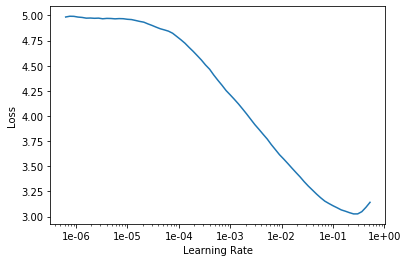

In [13]:
%%time
run_find_lr(learn, "stage1-1epochs-96_128-rescaled")

In [14]:
initial_lr = 1e-3

In [15]:
%%time
# with neptune.create_experiment(params = {"initial_lr": initial_lr}): 
#     learn.callbacks.append(NeptuneMonitor())
run_training(learn, "stage1-1epochs-96_128-rescaled", lr=initial_lr, n_epochs=1)

INFO:root:running training stage1-1epochs-96_128-rescaled


epoch,train_loss,valid_loss,accuracy,time
0,1.263267,2.065803,0.435890,20:22


INFO:root:finished training stage1-1epochs-96_128-rescaled
INFO:root:saved stage1-1epochs-96_128-rescaled


CPU times: user 1min 40s, sys: 36.6 s, total: 2min 17s
Wall time: 20min 22s


In [20]:
# learn = load_learner(PATH_TO_MODELS, "stage1-1epochs-96_128-rescaled.pkl")
# learn.data = data

# Stage 2

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


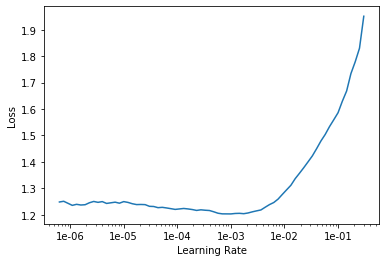

In [16]:
learn.unfreeze()
run_find_lr(learn, "stage2-3epochs-96_128-rescaled")